In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils as ut

months = ut.generate_dates()

product_A = ut.generate_random_sales(50, 100, len(months))
product_B = ut.generate_random_sales(30, 80, len(months))
product_C = ut.generate_random_sales(20, 60, len(months))
product_D = ut.generate_random_sales(10, 50, len(months))

df_initial = pd.DataFrame({
    'Month': months,
    'Product_A': product_A,
    'Product_B': product_B,
    'Product_C': product_C,
    'Product_D': product_D
})

df_initial.to_csv('data/initial.csv', index=False)

df_initial


,Month,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,55,49,46,20
1,2025-02-01,97,51,51,14
2,2025-03-01,78,52,38,50
3,2025-04-01,77,46,48,49
4,2025-05-01,93,64,26,41
5,2025-06-01,52,62,22,40
6,2025-07-01,86,63,40,37
7,2025-08-01,75,52,47,15
8,2025-09-01,97,57,36,24
9,2025-10-01,71,47,55,44


In [2]:
import pandas as pd


df = pd.read_csv('data/initial.csv')
df['Month'] = pd.to_datetime(df['Month'])


df['Total_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)


df['Average_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)


df['Month_over_Month_Growth'] = df['Total_Sales'].pct_change() * 100

def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df['Quarter'] = df['Month'].dt.month.apply(get_quarter)

df['Max_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmax(axis=1)


df['Min_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmin(axis=1)


df.to_csv("data/final.csv", index=False)

df


,Month,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Month_over_Month_Growth,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,55,49,46,20,170,42.50,NaN,Q1,Product_A,Product_D
1,2025-02-01,97,51,51,14,213,53.25,25.294118,Q1,Product_A,Product_D
2,2025-03-01,78,52,38,50,218,54.50,2.347418,Q1,Product_A,Product_C
3,2025-04-01,77,46,48,49,220,55.00,0.917431,Q2,Product_A,Product_B
4,2025-05-01,93,64,26,41,224,56.00,1.818182,Q2,Product_A,Product_C
5,2025-06-01,52,62,22,40,176,44.00,-21.428571,Q2,Product_B,Product_C
6,2025-07-01,86,63,40,37,226,56.50,28.409091,Q3,Product_A,Product_D
7,2025-08-01,75,52,47,15,189,47.25,-16.371681,Q3,Product_A,Product_D
8,2025-09-01,97,57,36,24,214,53.50,13.227513,Q3,Product_A,Product_D
9,2025-10-01,71,47,55,44,217,54.25,1.401869,Q4,Product_A,Product_D


In [3]:


df = pd.read_csv('data/final.csv', parse_dates=['Month'])


pivot_avg = df.pivot_table(
    values=['Product_A','Product_B','Product_C','Product_D'],
    index='Quarter',
    aggfunc='mean'
)


pivot_avg['Total_Average'] = pivot_avg.sum(axis=1)


pivot_total = df.pivot_table(
    values='Total_Sales',
    index='Quarter',
    aggfunc='sum'
)


best_month_date = df.loc[df['Total_Sales'].idxmax(), 'Month']
best_month_value = df['Total_Sales'].max()


product_totals = df[['Product_A','Product_B','Product_C','Product_D']].sum()
best_product = product_totals.idxmax()
best_product_value = product_totals.max()


best_quarter_value = pivot_total['Total_Sales'].max()
best_quarter = pivot_total['Total_Sales'].idxmax()



output = []

output.append("=== Pivot Table: Average Sales per Quarter per Product ===")
output.append(pivot_avg.to_csv())

output.append("=== Pivot Table: Total Sales per Quarter ===")
output.append(pivot_total.to_csv())

output.append("=== Summary Metrics ===")
output.append(f"Best Month: {best_month_date.date()}")
output.append(f"Best Product: {best_product}")
output.append(f"Best Quarter: {best_quarter}")


with open('data/output.csv', 'w') as f:
    for block in output:
        f.write(block + "\n")




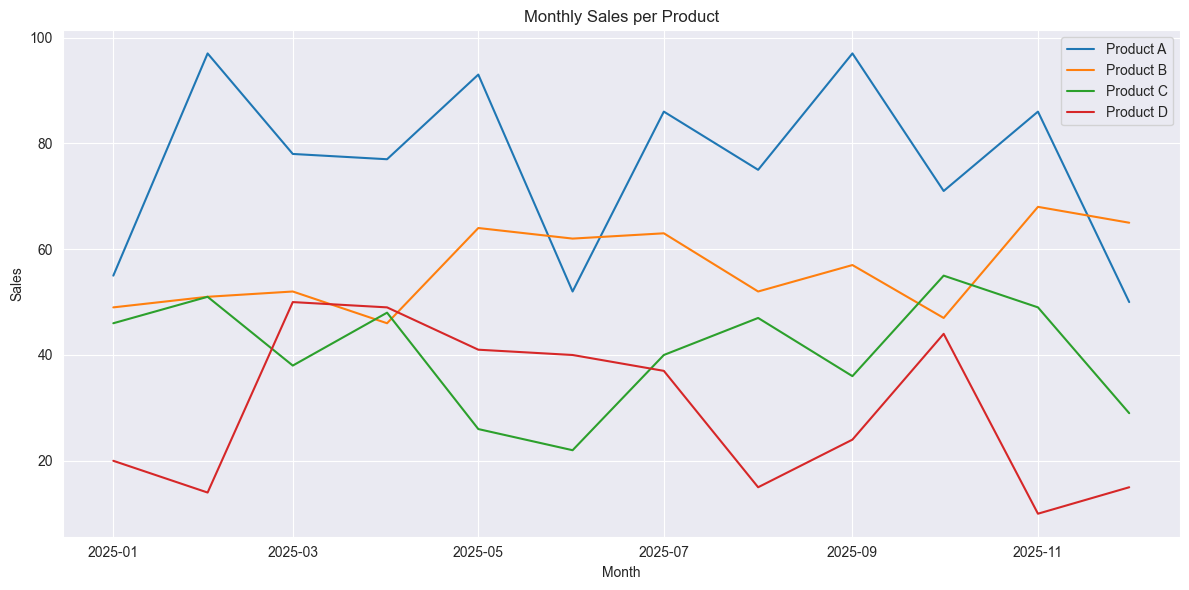

In [4]:
df = pd.read_csv('data/final.csv', parse_dates=['Month'])
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Product_A'], label='Product A')
plt.plot(df['Month'], df['Product_B'], label='Product B')
plt.plot(df['Month'], df['Product_C'], label='Product C')
plt.plot(df['Month'], df['Product_D'], label='Product D')

plt.title("Monthly Sales per Product")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


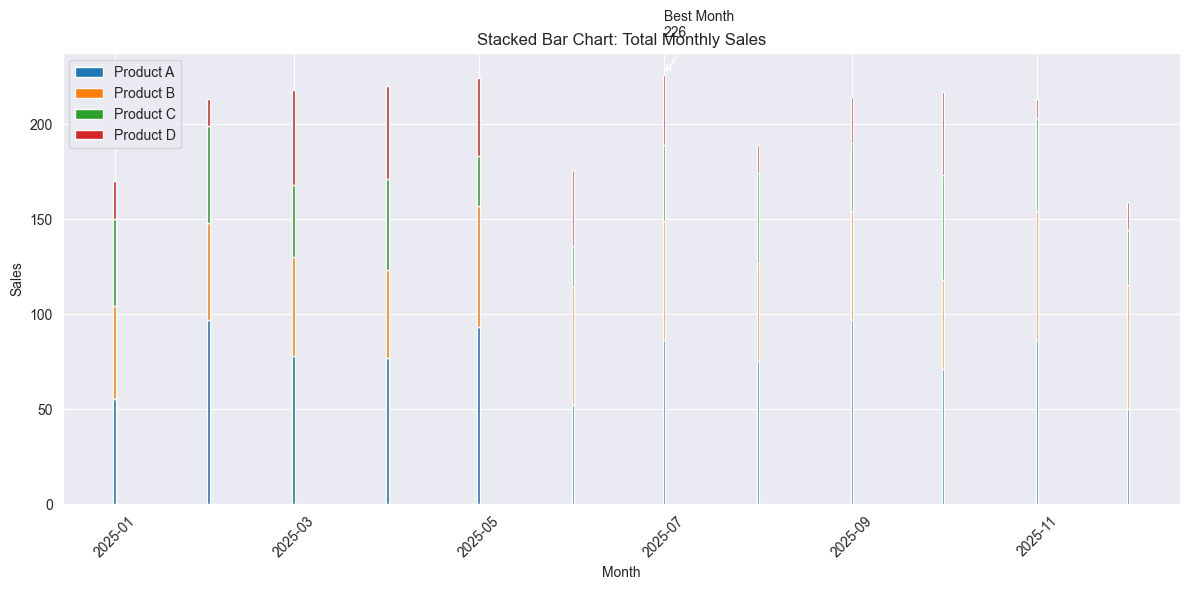

In [5]:
plt.figure(figsize=(12, 6))

plt.bar(df['Month'], df['Product_A'], label='Product A')
plt.bar(df['Month'], df['Product_B'], bottom=df['Product_A'], label='Product B')
plt.bar(df['Month'], df['Product_C'], bottom=df['Product_A']+df['Product_B'], label='Product C')
plt.bar(df['Month'], df['Product_D'], bottom=df['Product_A']+df['Product_B']+df['Product_C'], label='Product D')

plt.title("Stacked Bar Chart: Total Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(loc='upper left')
plt.xticks(rotation=45)


best_idx = df['Total_Sales'].idxmax()
best_month = df['Month'][best_idx]
best_value = df['Total_Sales'][best_idx]

plt.annotate(
    f"Best Month\n{best_value}",
    xy=(best_month, best_value),
    xytext=(best_month, best_value + 20),
    arrowprops=dict(arrowstyle="->")
)

plt.tight_layout()
plt.show()


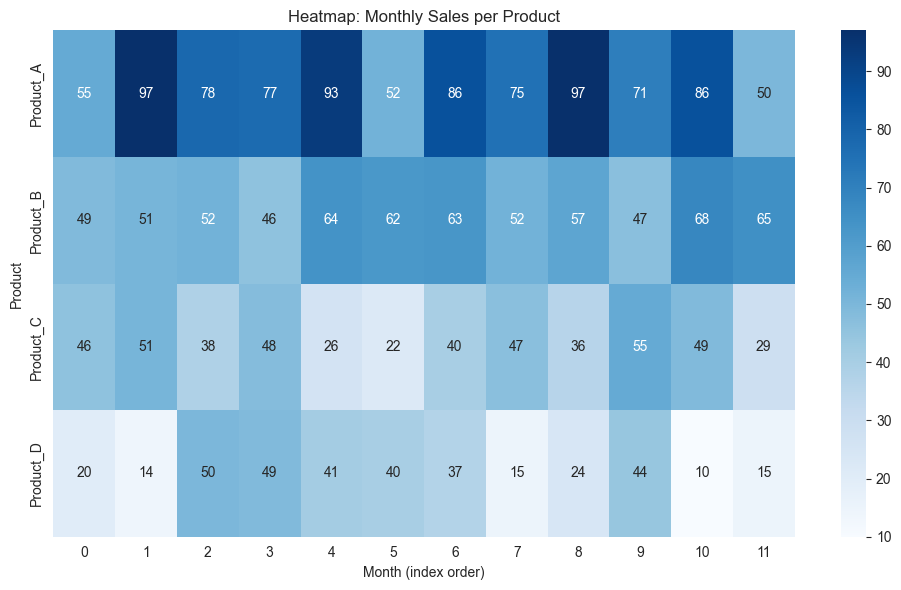

In [6]:
import seaborn as sns
heatmap_data = df[['Product_A','Product_B','Product_C','Product_D']]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap: Monthly Sales per Product")
plt.xlabel("Month (index order)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()



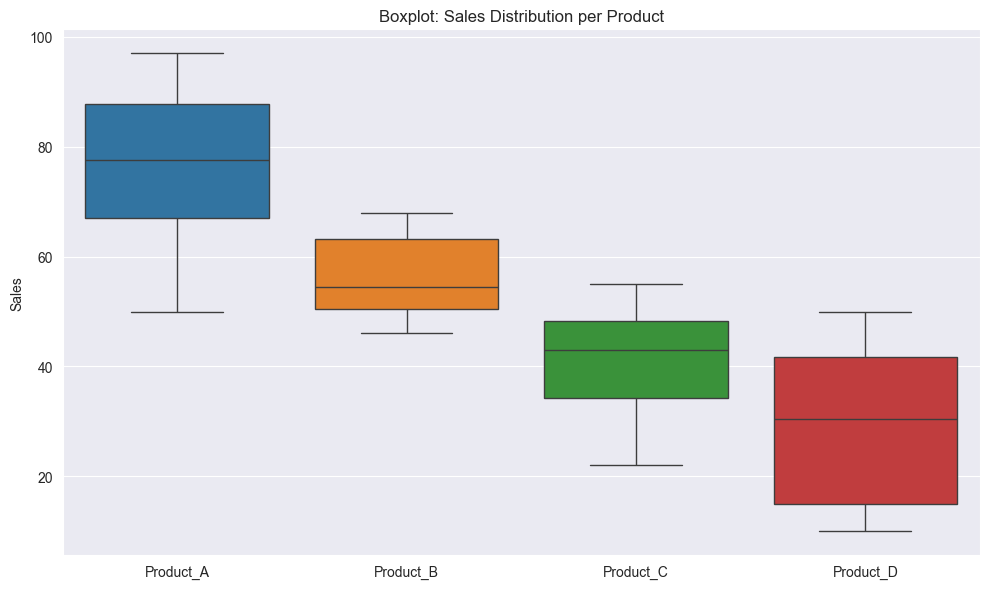

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Product_A','Product_B','Product_C','Product_D']])
plt.title("Boxplot: Sales Distribution per Product")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


In [8]:
best_month = None
best_product = None
best_quarter = None
with open('data/output.csv', 'r') as f:
    lines = f.readlines()
for line in lines:
    line = line.strip()
    if line.startswith("Best Month:"):
        best_month = line.replace("Best Month: ", "")
    elif line.startswith("Best Product:"):
        best_product = line.replace("Best Product: ", "")
    elif line.startswith("Best Quarter:"):
        best_quarter = line.replace("Best Quarter: ", "")


print("As a conclsion and a response to the 6th part of the project")
print("The product that contributed the most to sales over the year is", best_product )
print("the quarter with the highest sales is ", best_quarter)
print("using these information we could improve our marketing strategy accordingly")
print(f"we can now increase our stock amount for the best seller {best_product} and focus on advertising our store and give some kind of reduction throught out the year ")

As a conclsion and a response to the 6th part of the project
The product that contributed the most to sales over the year is Product_A
the quarter with the highest sales is  Q3
using these information we could improve our marketing strategy accordingly
we can now increase our stock amount for the best seller Product_A and focus on advertising our store and give some kind of reduction throught out the year 
